In [ ]:
# %pip uninstall -y gymnasium
# %pip install "gymnasium==0.29.1"
# %pip install "gym==0.26.2"

Found existing installation: gymnasium 1.0.0
Uninstalling gymnasium-1.0.0:
  Successfully uninstalled gymnasium-1.0.0
Note: you may need to restart the kernel to use updated packages.
  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Get a gym environment

from torchrl.envs import GymEnv
env = GymEnv("Pendulum-v1")


In [2]:
# reset() -> Initiates and episode
# step() -> Executes an action

env

GymEnv(env=Pendulum-v1, batch_size=torch.Size([]), device=None)

In [3]:
reset = env.reset()
print(reset)

TensorDict(
    fields={
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)


In [ ]:
# Take a random action in the action space

reset_with_action = env.rand_action(reset)
print(reset_with_action) # Additional action entry

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)


In [ ]:
print(reset_with_action["action"]) # Retireve action taken

tensor([1.5775])


In [7]:
# We pass the action to env. We pass the entire tensordict to the step method.
stepped_data = env.step(reset_with_action)
print(stepped_data) # Has a "next" entry (a tensordict itself) containing, obs, r, and done resulting from the action.
                    # We call this format TED, for TorchRL Episode Data format

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
                terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
            batch_size=torch.Size([]),
            device=None,
            is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        terminat

In [ ]:
# How to bring the "next" entry at the root to perform the next step
from torchrl.envs import step_mdp

data = step_mdp(stepped_data)
print(data) # Delivers a data structure corresponding to obs after step in the MDP

TensorDict(
    fields={
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)


In [ ]:
# Rollout() allows you to compute action, make step, and move in the MDP in a closed loop

rollout = env.rollout(max_steps=10) # without a policy it runs random actions
print(rollout) # Like step data but with batch_size

# It can useful to run a naive, policyless rollout at first to check what is to be expected from an environment at a glance.

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([10, 3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                terminated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False)},
            batch_size=torch.Size([10]),
            device=None,
            is_shared=False),
        observation: Tensor(shape=torch.Size([10, 3]), device=cpu, dtype=torch.float32, 

In [ ]:
# tensordict can be indexed (one of the batches)

transition = rollout[3]
print(transition)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
                terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
            batch_size=torch.Size([]),
            device=None,
            is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        terminat

In [ ]:
# Transforming and environment

# We examine StepCounter transform. An exhaustive list is available at: https://docs.pytorch.org/rl/stable/reference/envs.html#id2

from torchrl.envs import StepCounter, TransformedEnv

transformed_env = TransformedEnv(env, StepCounter(max_steps = 10)) # Env has extra entry that tracks the number of steps
rollout = transformed_env.rollout(max_steps=100) # The trajectory is truncated at 10 steps from above
print(rollout)



TensorDict(
    fields={
        action: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([10, 3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                step_count: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.int64, is_shared=False),
                terminated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False)},
            batch_size=torch.Size([10]),
            device=None,
       

In [ ]:
print(rollout["next", "truncated"])

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])


To explore further what TorchRL’s environments can do, go and check:

The step_and_maybe_reset() method that packs together step(), step_mdp() and reset().

Some environments like GymEnv support rendering through the from_pixels argument. Check the class docstrings to know more!

The batched environments, in particular ParallelEnv which allows you to run multiple copies of one same (or different!) environments on multiple processes.

Design your own environment with the Pendulum tutorial and learn about specs and stateless environments.

See the more in-depth tutorial about environments in the dedicated tutorial;

Check the multi-agent environment API if you’re interested in MARL;

TorchRL has many tools to interact with the Gym API such as a way to register TorchRL envs in the Gym register through register_gym(), an API to read the info dictionaries through set_info_dict_reader() or a way to control the gym backend thanks to set_gym_backend().

In [15]:
# TensorDictModules

# Plicy (simple): deterministic map from obs to action

import torch
from tensordict.nn import TensorDictModule

env = GymEnv("Pendulum-v1")
module = torch.nn.LazyLinear(out_features=env.action_spec.shape[-1]) # in_features is inferred with LazyLinear

policy = TensorDictModule(
    module,
    in_keys =["observation"],
    out_keys=["action"],
)


In [24]:
# Now, we can run this policy in the environment

rollout = env.rollout(max_steps=200, policy=policy)
print(rollout)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([200, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([200, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([200, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([200, 3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([200, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                terminated: Tensor(shape=torch.Size([200, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([200, 1]), device=cpu, dtype=torch.bool, is_shared=False)},
            batch_size=torch.Size([200]),
            device=None,
            is_shared=False),
        observation: Tensor(shape=torch.Size([200, 3]), device=cpu, dtype=torch.

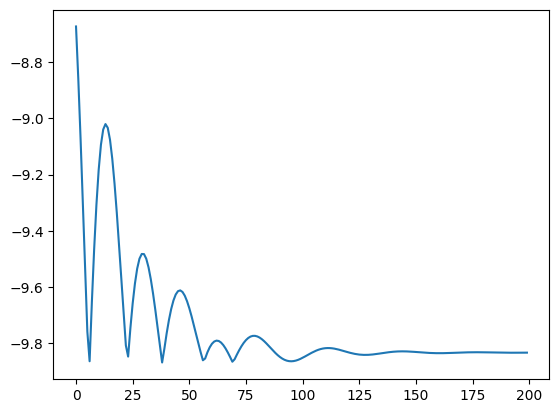

In [25]:
import matplotlib.pyplot as plt

plt.plot(rollout["next"]["reward"])
plt.show()

In [26]:
# Specialized wrappers

# To simplify incorporation of action, probaction, actorvalueoperator, actorcriticoperator

from torchrl.modules import Actor
policy = Actor(module)
rollout = env.rollout(max_steps=10, policy=policy)
print(rollout)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([10, 3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                terminated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False)},
            batch_size=torch.Size([10]),
            device=None,
            is_shared=False),
        observation: Tensor(shape=torch.Size([10, 3]), device=cpu, dtype=torch.float32, 

In [ ]:
# Networks (MLP and CNN). For RNN policies refer to https://docs.pytorch.org/rl/stable/tutorials/dqn_with_rnn.html#rnn-tuto

from torchrl.modules import MLP
module = MLP(
    out_features=env.action_spec.shape[-1],
    num_cells=[32,64],
    activation_class=torch.nn.Tanh,
)

policy = Actor(module)
rollout = env.rollout(max_steps=10, policy=policy)

In [28]:
env.action_spec

BoundedContinuous(
    shape=torch.Size([1]),
    space=ContinuousBox(
        low=Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, contiguous=True),
        high=Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, contiguous=True)),
    device=cpu,
    dtype=torch.float32,
    domain=continuous)

In [31]:
env.action_spec.low, env.action_spec.high

(tensor([-2.]), tensor([2.]))

In [39]:
# Probabilistic Policies

# TorchRL groups under a class various operations like finding distribution prameters, sampling, and retrieving log-probs.
# Actor: MLP takes 3 obs and outputs 2 params. NormalParamExtractor splits output into meand and std. ProbAcot reads
# those parameters as in_keys, create a distribution and populate tensordict with samples and logprobs.

from tensordict.nn.distributions import NormalParamExtractor
from torch.distributions import Normal
from torchrl.modules import ProbabilisticActor

backbone = MLP(in_features=3, out_features=2)
extractor = NormalParamExtractor()
module = torch.nn.Sequential(backbone, extractor)
td_module = TensorDictModule(module, in_keys=["observation"], out_keys=["loc", "scale"])
policy = ProbabilisticActor(
    td_module,
    in_keys=["loc", "scale"],
    out_keys=["action"],
    distribution_class=Normal,
    return_log_prob=True,
)

rollout = env.rollout(max_steps=10, policy=policy)
print(rollout)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        action_log_prob: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        loc: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([10, 3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                terminated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.b

In [42]:
rollout["loc"], rollout["scale"], rollout["action_log_prob"]

(tensor([[-0.0259],
         [ 0.3075],
         [ 0.6179],
         [ 0.9124],
         [ 1.1959],
         [ 1.4700],
         [ 1.7334],
         [ 1.9807],
         [ 2.2031],
         [ 2.4045]], grad_fn=<StackBackward0>),
 tensor([[0.8737],
         [0.8932],
         [0.9106],
         [0.9267],
         [0.9428],
         [0.9603],
         [0.9810],
         [1.0066],
         [1.0389],
         [1.0802]], grad_fn=<StackBackward0>),
 tensor([[-0.7839],
         [-0.8060],
         [-0.8253],
         [-0.8428],
         [-0.8600],
         [-0.8785],
         [-0.8998],
         [-0.9256],
         [-0.9571],
         [-0.9961]], grad_fn=<StackBackward0>))

In [ ]:
# We can control the sampling of the action to use the E[x] or other properties

from torchrl.envs.utils import ExplorationType, set_exploration_type

with set_exploration_type(ExplorationType.DETERMINISTIC):
    # Takes the mean of the action
    rollout = env.rollout(max_steps=10, policy=policy)
    
with set_exploration_type(ExplorationType.RANDOM):
    rollout = env.rollout(max_steps=10, policy=policy)
    

In [ ]:
# Exploration, explore EGreedyModule (check also AdditiveGaussianModule and OrnsteinUhlenbeckProcessModule)
# To see this model in action we revert to a deterministic policy

from tensordict.nn import TensorDictSequential
from torchrl.modules import EGreedyModule

policy = Actor(MLP(3, 1, num_cells=[32, 32, 32]))

exploration_module = EGreedyModule(
    spec=env.action_spec, annealing_num_steps=1000, eps_init=0.5, eps_end=0.1 # 50% -> 10% prob random action
) # Action space needed for random sampling

In [58]:
exploration_module.eps

tensor(0.5000)

In [51]:
exploration_policy = TensorDictSequential(policy, exploration_module)

with set_exploration_type(ExplorationType.DETERMINISTIC):
    # Turns off exploration
    rollout = env.rollout(max_steps=10, policy=exploration_policy)
with set_exploration_type(ExplorationType.RANDOM):
    # Turns on exploration
    rollout = env.rollout(max_steps=10, policy=exploration_policy)

In [52]:
exploration_policy

TensorDictSequential(
    module=ModuleList(
      (0): Actor(
          module=MLP(
            (0): Linear(in_features=3, out_features=32, bias=True)
            (1): Tanh()
            (2): Linear(in_features=32, out_features=32, bias=True)
            (3): Tanh()
            (4): Linear(in_features=32, out_features=32, bias=True)
            (5): Tanh()
            (6): Linear(in_features=32, out_features=1, bias=True)
          ),
          device=cpu,
          in_keys=['observation'],
          out_keys=['action'])
      (1): EGreedyModule()
    ),
    device=cpu,
    in_keys=['observation'],
    out_keys=['action'])

In [59]:
# Q-Value actors: require and estimate of the action value. With finite discrete actions we can do a table.
# DQN solved that problem by encoding Q(s,a) (state-action function) with a NN.

env = GymEnv("CartPole-v1")
print(env.action_spec)

OneHot(
    shape=torch.Size([2]),
    space=CategoricalBox(n=2),
    device=cpu,
    dtype=torch.int64,
    domain=discrete)


In [60]:
num_actions = 2
value_net = TensorDictModule(
    MLP(out_features=num_actions, num_cells=[32, 32]),
    in_keys=["observation"],
    out_keys=["action_value"],
)

In [62]:
# We build our Q-Value actor by adding a QValueModule

from torchrl.modules import QValueModule

policy = TensorDictSequential(
    value_net, # writes action values in the tensordict
    QValueModule(spec=env.action_spec), # Reads "action_value" entry by default
)

In [ ]:
rollout = env.rollout(max_steps=3, policy=policy) # Deterministic policy since it uses argmax
print(rollout) # We have action_value and choose_action_value

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([3, 2]), device=cpu, dtype=torch.int64, is_shared=False),
        action_value: Tensor(shape=torch.Size([3, 2]), device=cpu, dtype=torch.float32, is_shared=False),
        chosen_action_value: Tensor(shape=torch.Size([3, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([3, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([3, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([3, 4]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([3, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                terminated: Tensor(shape=torch.Size([3, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([3, 1]), device=cpu, dtype=torch

In [69]:
rollout["chosen_action_value"], rollout["action_value"], rollout["action"]

(tensor([[ 0.0021],
         [-0.0483],
         [-0.0382]], grad_fn=<StackBackward0>),
 tensor([[ 0.0021, -0.1316],
         [-0.0483, -0.0830],
         [-0.0897, -0.0382]], grad_fn=<StackBackward0>),
 tensor([[1, 0],
         [1, 0],
         [0, 1]]))

In [ ]:
# During data collection, we explore the environment. We use the EGReedyModule

policy_explore = TensorDictSequential(policy, EGreedyModule(env.action_spec))

with set_exploration_type(ExplorationType.RANDOM):
    rollout_explore = env.rollout(max_steps = 3, policy=policy_explore)

# EXTRA MATERIAL: https://docs.pytorch.org/rl/stable/reference/modules.html#ref-modules

In [ ]:
# GETTING STARTED WITH MODEL OPTIMIZATION

# A typical training loop looks like this

"""
for i in range(n_collections):
    data = get_next_batch(env, policy)
    for j in range(n_optim):
        loss = loss_fn(data)
        loss.backward()
        optim.step()
"""